In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from netam import shmoof, noof

In [2]:
train_df, val_df = shmoof.load_shmoof_dataframes("/Users/matsen/data/shmoof_edges_11-Jan-2023_NoNode0_iqtree_K80+R_masked.csv") #, sample_count=5000)

In [3]:
# Tang data

# full_df = pd.read_csv("/Users/matsen/data/tang-deepshm_size2_edges_22-May-2023.branch_length.csv", index_col=0).reset_index(drop=True)
# 
# # only keep rows where parent is different than child
# full_df = full_df[full_df["parent"] != full_df["child"]]
# 
# train_df = full_df.sample(frac=0.8)
# val_df = full_df.drop(train_df.index)


In [4]:
kmer_length = 5
max_length = 410

train_dataset = shmoof.SHMoofDataset(train_df, kmer_length=kmer_length, max_length=max_length)
val_dataset = shmoof.SHMoofDataset(val_df, kmer_length=kmer_length, max_length=max_length)

print(f"we have {len(train_dataset)} training examples and {len(val_dataset)} validation examples")

we have 35830 training examples and 13186 validation examples


In [5]:
model = shmoof.SHMoofModel(train_dataset)
burrito = shmoof.NoofBurrito(train_dataset, val_dataset, model, batch_size=1024, learning_rate=0.1, l2_regularization_coeff=1e-6)
print("starting training...")
losses = burrito.train(epochs=100)
burrito.write_shmoof_output("_ignore/reshmoof")

starting training...
Epoch [1/100]	 Loss: 0.062894761	 Val Loss: 0.067364218
Epoch [2/100]	 Loss: 0.058883852	 Val Loss: 0.066950019
Epoch [3/100]	 Loss: 0.058780761	 Val Loss: 0.066921146
Epoch [4/100]	 Loss: 0.058757971	 Val Loss: 0.066887548
Epoch [5/100]	 Loss: 0.058756949	 Val Loss: 0.066904591
Epoch [6/100]	 Loss: 0.058743768	 Val Loss: 0.066899278
Epoch [7/100]	 Loss: 0.058722599	 Val Loss: 0.066885251
Epoch [8/100]	 Loss: 0.058714641	 Val Loss: 0.06685288
Epoch [9/100]	 Loss: 0.058701392	 Val Loss: 0.066814939
Epoch [10/100]	 Loss: 0.058689012	 Val Loss: 0.066830729
Epoch [11/100]	 Loss: 0.058680725	 Val Loss: 0.066805644
Epoch [12/100]	 Loss: 0.05867086	 Val Loss: 0.066768739
Epoch [13/100]	 Loss: 0.058650474	 Val Loss: 0.066756802
Epoch [14/100]	 Loss: 0.058650676	 Val Loss: 0.066737785
Epoch [15/100]	 Loss: 0.058640871	 Val Loss: 0.066734264
Epoch [16/100]	 Loss: 0.058627687	 Val Loss: 0.066780542
Epoch [17/100]	 Loss: 0.058613815	 Val Loss: 0.066721039
Epoch [18/100]	 Loss:

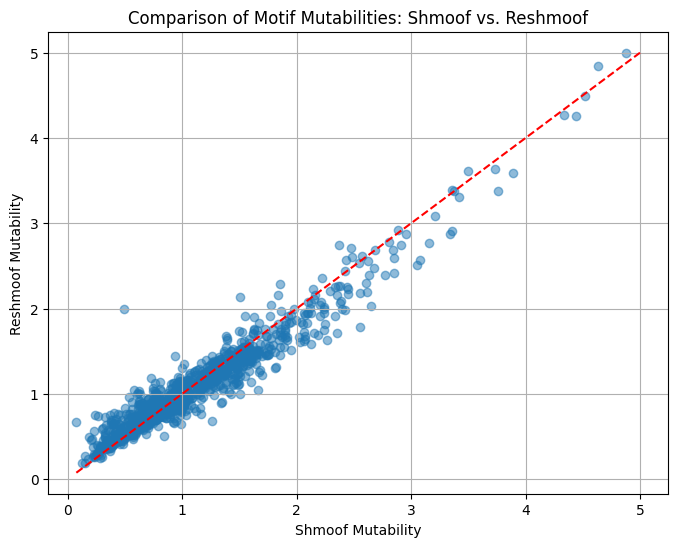

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load motif mutabilities
shmoof_motifs = pd.read_csv('_ignore/original_shmoof/mutabilities_context.tsv', sep='\t')
reshmoof_motifs = pd.read_csv('_ignore/reshmoof/motif_mutabilities.tsv', sep='\t')

# Merge dataframes
merged_motifs = pd.merge(shmoof_motifs, reshmoof_motifs, on='Motif', how='inner', suffixes=('_shmoof', '_reshmoof'))

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_motifs['Mutability_shmoof'], merged_motifs['Mutability_reshmoof'], alpha=0.5)

# Determine bounds for y=x line
min_bound = min(merged_motifs['Mutability_shmoof'].min(), merged_motifs['Mutability_reshmoof'].min())
max_bound = max(merged_motifs['Mutability_shmoof'].max(), merged_motifs['Mutability_reshmoof'].max())

# Add y=x line
plt.plot([min_bound, max_bound], [min_bound, max_bound], 'r--')

plt.xlabel('Shmoof Mutability')
plt.ylabel('Reshmoof Mutability')
plt.title('Comparison of Motif Mutabilities: Shmoof vs. Reshmoof')
plt.grid(True)
plt.show()

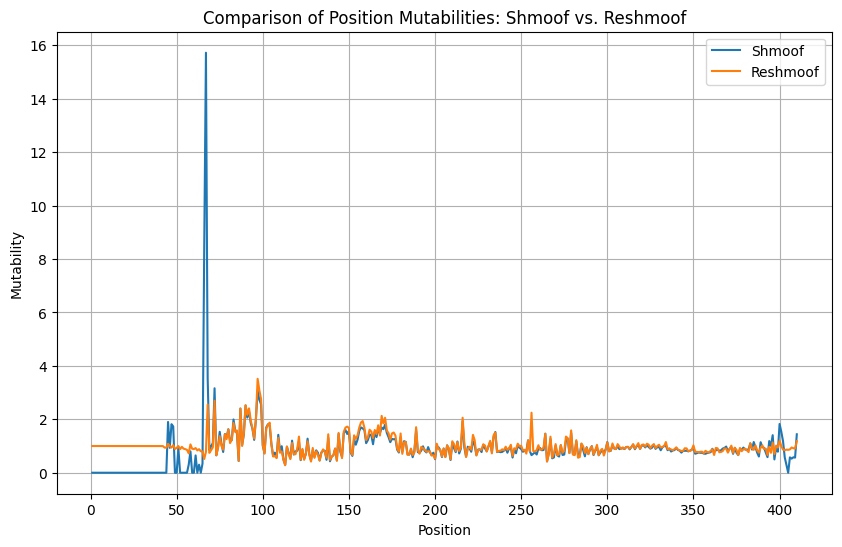

In [7]:
# Load position mutabilities
shmoof_positions = pd.read_csv('_ignore/original_shmoof/mutabilities_position.tsv', sep='\t')
reshmoof_positions = pd.read_csv('_ignore/reshmoof/site_mutabilities.tsv', sep='\t')

# Merge dataframes
merged_positions = pd.merge(shmoof_positions, reshmoof_positions, on='Position', suffixes=('_shmoof', '_reshmoof'))
merged_positions.sort_values(by='Position', inplace=True)

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(merged_positions['Position'], merged_positions['Mutability_shmoof'], label='Shmoof')
plt.plot(merged_positions['Position'], merged_positions['Mutability_reshmoof'], label='Reshmoof')
plt.xlabel('Position')
plt.ylabel('Mutability')
plt.title('Comparison of Position Mutabilities: Shmoof vs. Reshmoof')
plt.legend()
plt.grid(True)
plt.show()


Training with regularization coefficient 0
Epoch [1/20]	 Loss: 0.064784973	 Val Loss: 0.067813488
Epoch [2/20]	 Loss: 0.059255507	 Val Loss: 0.067394581
Epoch [3/20]	 Loss: 0.059091071	 Val Loss: 0.067295391
Epoch [4/20]	 Loss: 0.059056442	 Val Loss: 0.067251619
Epoch [5/20]	 Loss: 0.059038429	 Val Loss: 0.067260924
Epoch [6/20]	 Loss: 0.059023433	 Val Loss: 0.067255032
Epoch [7/20]	 Loss: 0.059009175	 Val Loss: 0.067226961
Epoch [8/20]	 Loss: 0.059006673	 Val Loss: 0.067160186
Epoch [9/20]	 Loss: 0.058992344	 Val Loss: 0.067187041
Epoch [10/20]	 Loss: 0.058978927	 Val Loss: 0.06720197
Epoch [11/20]	 Loss: 0.058981966	 Val Loss: 0.067179032
Epoch [12/20]	 Loss: 0.058971331	 Val Loss: 0.067163793
Epoch [13/20]	 Loss: 0.058957193	 Val Loss: 0.067133835
Epoch [14/20]	 Loss: 0.058952999	 Val Loss: 0.067087455
Epoch [15/20]	 Loss: 0.058939351	 Val Loss: 0.067111519
Epoch [16/20]	 Loss: 0.058928863	 Val Loss: 0.067108155
Epoch [17/20]	 Loss: 0.058918788	 Val Loss: 0.067051591
Epoch [18/20]	 

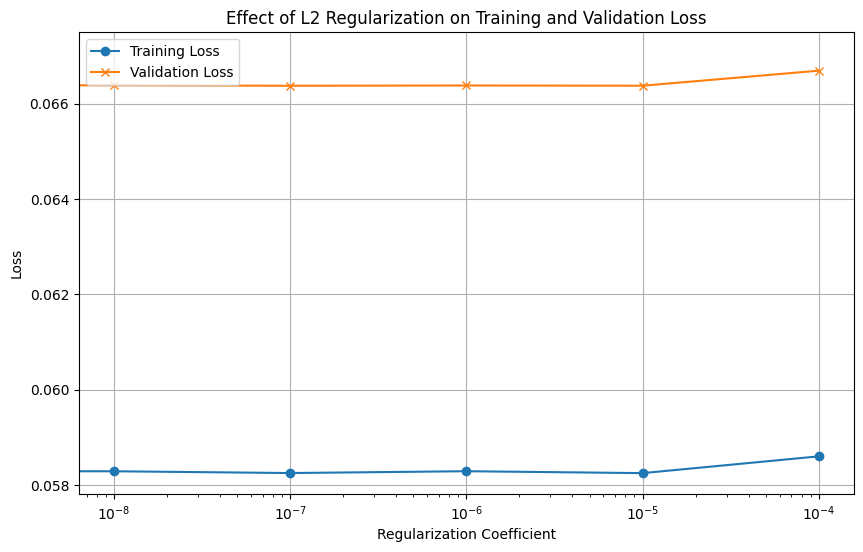

In [8]:
regularization_coeffs = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
results = []

for coeff in regularization_coeffs:
    print(f"Training with regularization coefficient {coeff}")
    model = shmoof.SHMoofModel(train_dataset)
    burrito = shmoof.NoofBurrito(train_dataset, val_dataset, model, batch_size=1024, learning_rate=0.1, l2_regularization_coeff=1e-6)
    loss_history = burrito.train(epochs=20)
    final_training_loss = loss_history['training_losses'].iloc[-1]
    final_validation_loss = loss_history['validation_losses'].iloc[-1]

    results.append({
        'Regularization': coeff,
        'Final_Training_Loss': final_training_loss,
        'Final_Validation_Loss': final_validation_loss
    })

regularization_results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
plt.plot(regularization_results_df['Regularization'], regularization_results_df['Final_Training_Loss'], label='Training Loss', marker='o')
plt.plot(regularization_results_df['Regularization'], regularization_results_df['Final_Validation_Loss'], label='Validation Loss', marker='x')

plt.xscale('log')
plt.xlabel('Regularization Coefficient')
plt.ylabel('Loss')
plt.title('Effect of L2 Regularization on Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
flipped_model = shmoof.SHMoofModel(train_dataset)
flipped_burrito = shmoof.NoofBurrito(val_dataset, train_dataset, flipped_model, batch_size=1024, learning_rate=0.1, l2_regularization_coeff=1e-6)
losses = burrito.train(epochs=100)

Epoch [1/100]	 Loss: 0.058536625	 Val Loss: 0.066602246
Epoch [2/100]	 Loss: 0.058538455	 Val Loss: 0.066645718
Epoch 00032: reducing learning rate of group 0 to 2.0000e-02.
Epoch [3/100]	 Loss: 0.058410476	 Val Loss: 0.066461153
Epoch [4/100]	 Loss: 0.05835799	 Val Loss: 0.066459398
Epoch [5/100]	 Loss: 0.058355537	 Val Loss: 0.06645872
Epoch [6/100]	 Loss: 0.058355113	 Val Loss: 0.066459415
Epoch [7/100]	 Loss: 0.058354065	 Val Loss: 0.066451104
Epoch [8/100]	 Loss: 0.058353104	 Val Loss: 0.066463708
Epoch [9/100]	 Loss: 0.058352856	 Val Loss: 0.066453996
Epoch [10/100]	 Loss: 0.058350102	 Val Loss: 0.066449494
Epoch [11/100]	 Loss: 0.058352565	 Val Loss: 0.066457276
Epoch [12/100]	 Loss: 0.058351373	 Val Loss: 0.066444321
Epoch [13/100]	 Loss: 0.058350741	 Val Loss: 0.066454755
Epoch [14/100]	 Loss: 0.058352187	 Val Loss: 0.066447535
Epoch [15/100]	 Loss: 0.058352825	 Val Loss: 0.066447647
Epoch [16/100]	 Loss: 0.058348083	 Val Loss: 0.066452781
Epoch [17/100]	 Loss: 0.058350264	 Va

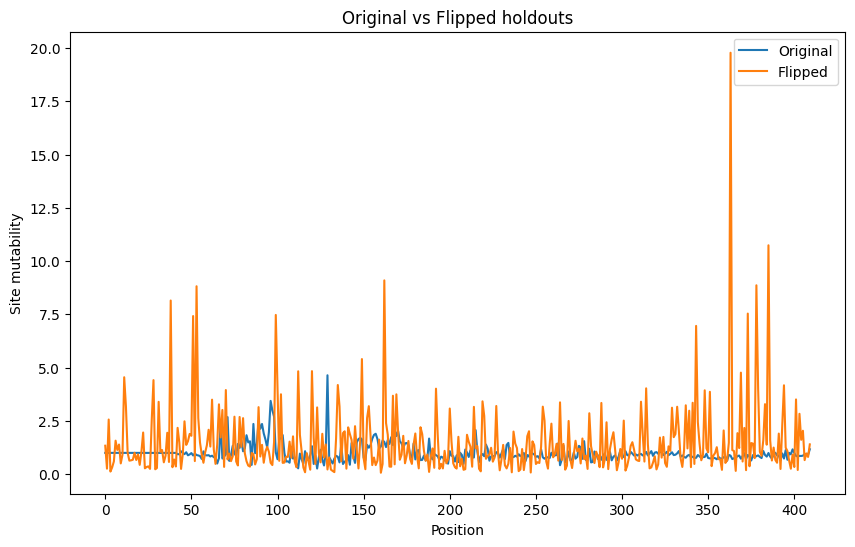

In [22]:
compare_holdout = pd.DataFrame({"original": model.site_rates.detach().numpy(), "flipped": flipped_model.site_rates.detach().numpy()})

import matplotlib.pyplot as plt
import pandas as pd

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(compare_holdout.index, compare_holdout['original'], label='Original')
plt.plot(compare_holdout.index, compare_holdout['flipped'], label='Flipped')

# Adding title and labels
plt.title('Original vs Flipped holdouts')
plt.xlabel('Position')
plt.ylabel('Site mutability')

# Adding legend
plt.legend()

# Show plot
plt.show()
